In [1]:
from pathlib import Path
import pandas as pd, numpy as np
TABLES = Path("../results/tables")
files = sorted(TABLES.glob("nullcal_gaussian_p*.csv"))
df = pd.concat([pd.read_csv(f).assign(file=f.name) for f in files], ignore_index=True)
df.head()

,model,p,n1,n2,seed,t_lct_0.05,R_lct_0.05,fdp_lct_0.05,any_reject_lct_0.05,R_over_M_lct_0.05,...,any_reject_lctb_0.05_B500,R_over_M_lctb_0.05_B500,t_lctb_0.10_B500,R_lctb_0.10_B500,fdp_lctb_0.10_B500,any_reject_lctb_0.10_B500,R_over_M_lctb_0.10_B500,lctb_B500_wall_time_s,wall_time_s,file
0,gaussian,250,80,80,0,1.000000e-09,0,0.0,0,0.0,...,0,0.0,1.000000e-09,0,0.0,0,0.0,2.967617,5.502574,nullcal_gaussian_p250_n80_80_R50.csv
1,gaussian,250,80,80,1,1.000000e-09,0,0.0,0,0.0,...,0,0.0,1.000000e-09,0,0.0,0,0.0,2.858450,4.887290,nullcal_gaussian_p250_n80_80_R50.csv
2,gaussian,250,80,80,2,1.000000e-09,0,0.0,0,0.0,...,0,0.0,1.000000e-09,0,0.0,0,0.0,2.407823,4.073900,nullcal_gaussian_p250_n80_80_R50.csv
3,gaussian,250,80,80,3,1.000000e-09,0,0.0,0,0.0,...,0,0.0,1.000000e-09,0,0.0,0,0.0,2.129494,3.753407,nullcal_gaussian_p250_n80_80_R50.csv
4,gaussian,250,80,80,4,1.000000e-09,0,0.0,0,0.0,...,0,0.0,1.000000e-09,0,0.0,0,0.0,2.267527,3.795404,nullcal_gaussian_p250_n80_80_R50.csv


In [2]:
import re
df["p"] = df["file"].str.extract(r'_p(\d+)_').astype(int)
rt_cols = [c for c in df.columns if c.startswith("lctb_B") and c.endswith("_wall_time_s")]
rt = df.melt(id_vars=["file","p"], value_vars=rt_cols, var_name="metric", value_name="sec")
rt["B"] = rt["metric"].str.extract(r'B(\d+)', expand=False).astype(int)
rt_agg = rt.groupby(["p","B"])["sec"].mean().reset_index()
rt_agg

,p,B,sec
0,250,50,0.206298
1,250,100,0.406636
2,250,200,0.813985
3,250,500,2.087988
4,500,50,1.451039
5,500,100,2.872591
6,500,200,5.744683
7,500,500,14.421232


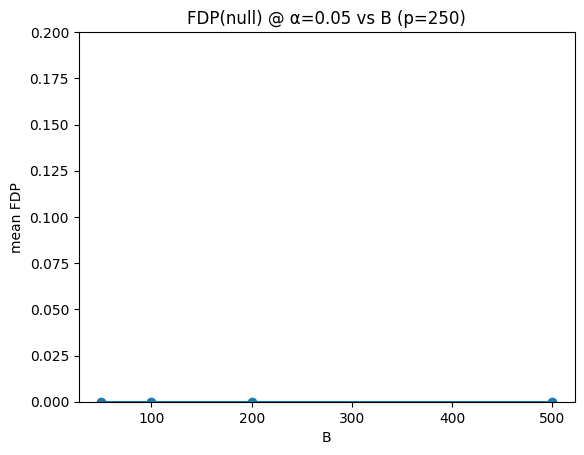

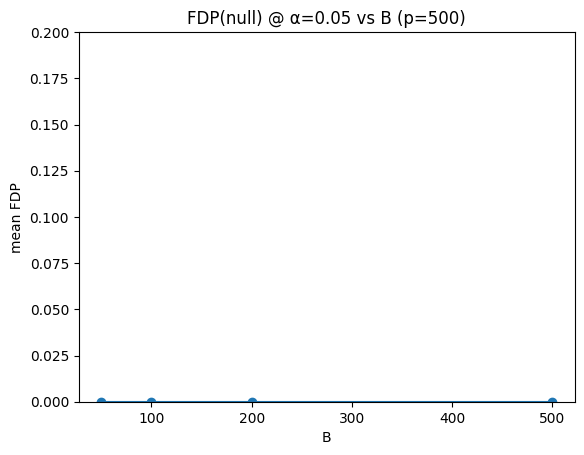

In [3]:
import matplotlib.pyplot as plt
fdp_cols = [c for c in df.columns if c.startswith("fdp_lctb_")]
F = df.melt(id_vars=["file","p"], value_vars=fdp_cols, var_name="metric", value_name="fdp")
F["alpha"] = F["metric"].str.extract(r'_(0\.05|0\.10)')
F["B"] = F["metric"].str.extract(r'_B(\d+)').astype(float)
agg = F.groupby(["p","alpha","B"])["fdp"].agg(mean="mean", se=lambda x:x.std(ddof=1)/np.sqrt(len(x))).reset_index()
for pval in sorted(agg["p"].unique()):
    sub = agg[(agg["p"]==pval) & (agg["alpha"]=="0.05")]
    plt.figure(); plt.errorbar(sub["B"], sub["mean"], yerr=sub["se"], fmt="o-")
    plt.title(f"FDP(null) @ α=0.05 vs B (p={pval})"); plt.xlabel("B"); plt.ylabel("mean FDP"); plt.ylim(0,0.2); plt.show()